In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

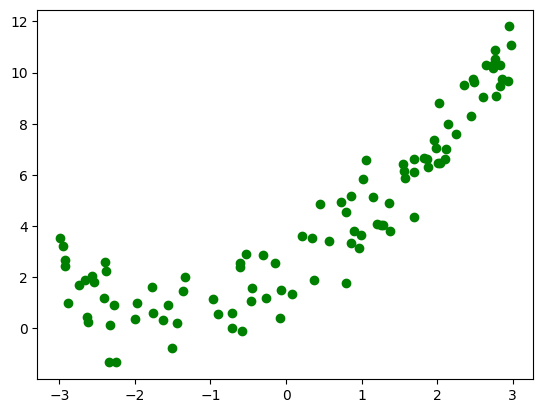

In [3]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2+1.5*X+2+np.random.randn(100,1)
plt.scatter(X,y,color="green")


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred_test=regressor.predict(X_test)
y_pred_test,y_test

(array([[-0.14946929],
        [ 6.27043908],
        [ 3.18310973],
        [ 5.40121147],
        [-0.1459482 ],
        [ 0.19506879],
        [ 2.94485934],
        [ 1.6768202 ],
        [-0.59546468],
        [ 8.41653663],
        [ 7.18343739],
        [ 7.34479899],
        [ 4.21640617],
        [ 3.48484251],
        [ 5.20472676],
        [ 3.42541078],
        [ 8.39705293],
        [ 8.14050492],
        [ 5.20401901],
        [ 4.4530383 ]]),
 array([[ 0.4499328 ],
        [ 6.41964988],
        [ 1.06708864],
        [ 3.63346076],
        [ 0.24127049],
        [ 1.19985548],
        [ 2.55024862],
        [ 0.2197525 ],
        [ 2.45715976],
        [11.80315833],
        [ 8.0038639 ],
        [ 7.60503985],
        [ 3.60762059],
        [ 1.19351753],
        [ 3.3218221 ],
        [ 2.88483928],
        [ 9.65262974],
        [10.88767023],
        [ 5.18562332],
        [ 1.88441221]]))

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
mse=mean_squared_error(y_test, y_pred_test)
mae=mean_absolute_error(y_test, y_pred_test)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred_test)
print("Score:", score)


Score: 0.7692748317539096


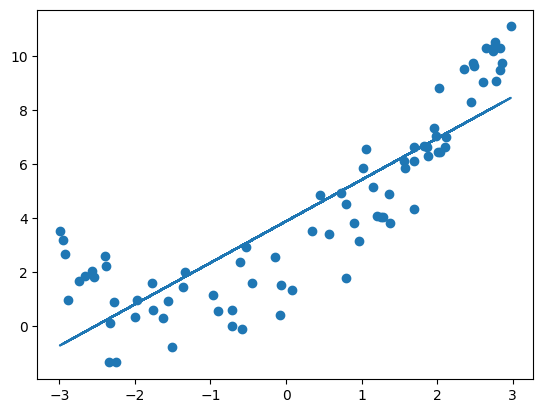

In [16]:
plt.plot(X_train,regressor.predict(X_train))
plt.scatter(X_train,y_train)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [20]:
X_train_poly

array([[ 1.00000000e+00,  8.06918700e-02,  6.51117788e-03],
       [ 1.00000000e+00, -1.62393709e+00,  2.63717167e+00],
       [ 1.00000000e+00, -2.92938115e+00,  8.58127395e+00],
       [ 1.00000000e+00,  2.77025867e+00,  7.67433309e+00],
       [ 1.00000000e+00, -1.96932863e+00,  3.87825527e+00],
       [ 1.00000000e+00,  1.69465523e+00,  2.87185633e+00],
       [ 1.00000000e+00, -8.02018571e-02,  6.43233788e-03],
       [ 1.00000000e+00,  7.30459982e-01,  5.33571785e-01],
       [ 1.00000000e+00, -1.36288221e+00,  1.85744792e+00],
       [ 1.00000000e+00, -2.27342989e+00,  5.16848348e+00],
       [ 1.00000000e+00, -2.38151289e+00,  5.67160362e+00],
       [ 1.00000000e+00,  1.25171942e+00,  1.56680150e+00],
       [ 1.00000000e+00, -7.12309614e-01,  5.07384986e-01],
       [ 1.00000000e+00, -1.76936368e+00,  3.13064785e+00],
       [ 1.00000000e+00, -2.66263988e+00,  7.08965112e+00],
       [ 1.00000000e+00,  9.03131745e-01,  8.15646949e-01],
       [ 1.00000000e+00,  2.10986581e+00

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
print(r2_score(y_test,y_pred))

0.9384497209204242


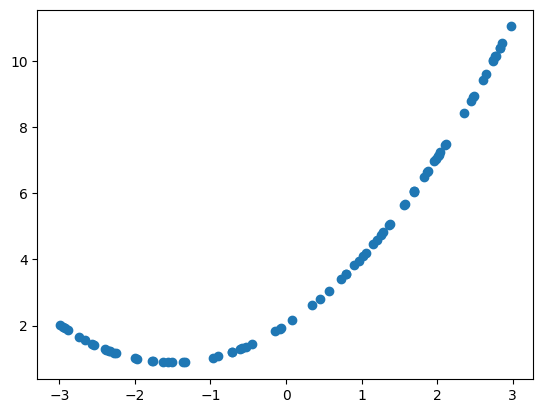

In [23]:
plt.scatter(X_train,regression.predict(X_train_poly))

In [24]:
from sklearn.pipeline import Pipeline

In [34]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()

    poly_regression = Pipeline([
        ('poly_features', poly_features),  # polynomial feature fit with linear reg
        ('lin_reg', lin_reg)
    ])

    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    plt.plot(X_new, y_pred_new, 'r', label=f"Degree {degree}")
    plt.legend()
    plt.show()

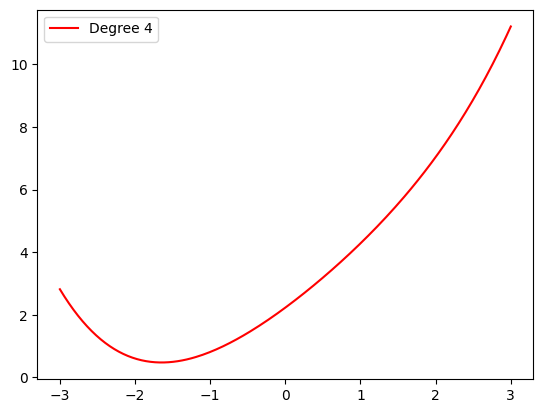

In [35]:
poly_regression(4)